
**Total: 200 Marks**

# ☕ Coffee Shop Revenue Prediction - Regression Models

Welcome! This assignment is designed to help you explore and implement various regression algorithms to predict daily revenue for coffee shops. Follow the instructions below and answer each question with both code and explanations where required.

---

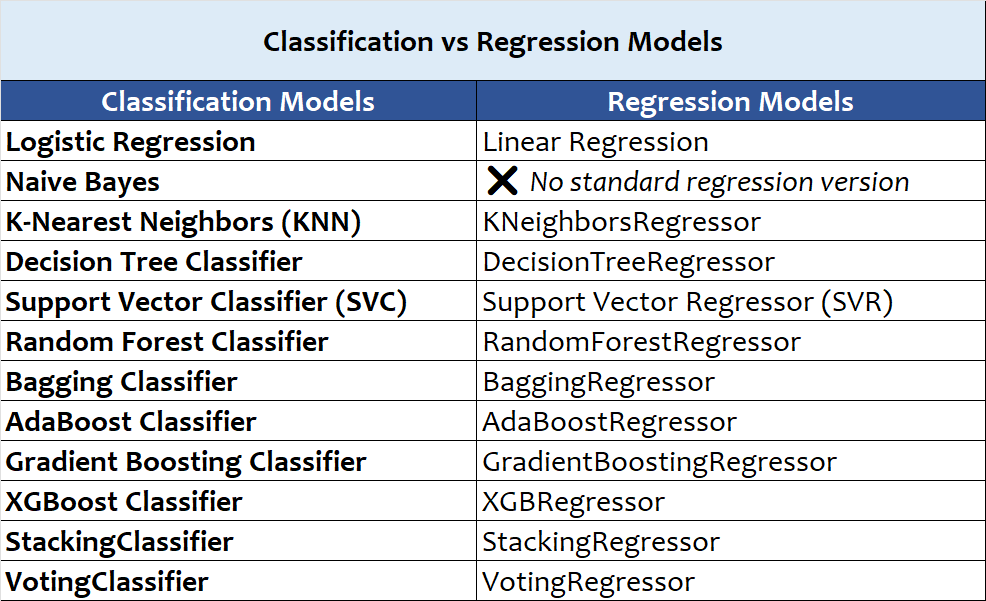

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, BaggingRegressor, AdaBoostRegressor,
    GradientBoostingRegressor, StackingRegressor, VotingRegressor
)
from xgboost import XGBRegressor

# Data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base regressors
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(),
    "Bagging": BaggingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
}

# Stacking and Voting
stacking = StackingRegressor(estimators=[
    ("rf", RandomForestRegressor()),
    ("gb", GradientBoostingRegressor()),
    ("xgb", XGBRegressor())
], final_estimator=LinearRegression())

voting = VotingRegressor(estimators=[
    ("rf", RandomForestRegressor()),
    ("gb", GradientBoostingRegressor()),
    ("xgb", XGBRegressor())
])

# Add ensemble models
models["Stacking"] = stacking
models["Voting"] = voting

# Evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    print(f"{name} - MSE: {mse:.4f}")


#  Coffee Shop Revenue Dataset

##  About Dataset

This dataset contains **2,000 rows** of data from coffee shops, offering detailed insights into factors that influence **daily revenue**.  
It includes key operational and environmental variables that provide a comprehensive view of how business activities and external conditions affect sales performance.

Designed for use in **predictive analytics and business optimization**, this dataset is a valuable resource for anyone looking to understand the relationship between **customer behavior**, **operational decisions**, and **revenue generation** in the **food and beverage industry**.

---

##  Columns & Variables

The dataset features a variety of columns capturing **operational details**, **customer activity**, and **external factors** such as **marketing spend** and **location foot traffic**.

### 1. `Number of Customers Per Day`
- The total number of customers visiting the coffee shop on any given day.
- **Range:** 50 - 500 customers

### 2. `Average Order Value ($)`
- The average dollar amount spent by each customer during their visit.
- **Range:** $2.50 - $10.00

### 3. `Operating Hours Per Day`
- The total number of hours the coffee shop is open for business each day.
- **Range:** 6 - 18 hours

### 4. `Number of Employees`
- The number of employees working on a given day.
- Can influence service speed, customer satisfaction, and ultimately, sales.
- **Range:** 2 - 15 employees

### 5. `Marketing Spend Per Day ($)`
- The amount of money spent on marketing campaigns or promotions on any given day.
- **Range:** $10 - $500 per day

### 6. `Location Foot Traffic (people/hour)`
- The number of people passing by the coffee shop per hour.
- Indicative of the shop's **location quality** and **potential customer base**.
- **Range:** 50 - 1000 people/hour

---

##  Target Variable

### `Daily Revenue ($)`
- The **dependent variable** representing the total revenue generated by the coffee shop each day.
- It is influenced by customer visits, average spending, marketing spend, and staff availability.
- **Range:** $200 - $10,000 per day




##  1. Load the Data — *[5 Marks]*
- Load the dataset using `pandas`
- Display the first few rows

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

In [ ]:
df = pd.read_csv('coffee_shop_revenue.csv')
df.head(5)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


##  2. Data Inspection — *[10 Marks]*
- Show the shape of the dataset
- Use `.info()` to display data types and null values
- Show value counts (if applicable)

---

In [ ]:
df.shape

(2000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [ ]:
# value counts
print("Operating_Hours_Per_Day value counts:")
print(df['Operating_Hours_Per_Day'].value_counts())
print("\nNumber_of_Employees value counts:")
print(df['Number_of_Employees'].value_counts())


Operating_Hours_Per_Day value counts:
Operating_Hours_Per_Day
11    194
16    182
17    180
12    178
15    175
13    164
9     161
8     161
6     155
14    153
10    149
7     148
Name: count, dtype: int64

Number_of_Employees value counts:
Number_of_Employees
11    178
8     175
3     167
14    164
2     156
7     156
5     153
6     150
4     145
9     145
10    142
13    137
12    132
Name: count, dtype: int64



##  3. Data Cleaning — *[15 Marks]*
- Handle missing values (if any)
- Encode categorical variables (if any)
- Convert data types where needed

---

In [ ]:
print(df.isnull().sum())

Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64


In [ ]:
df_clean = df.dropna()

In [ ]:
# Check data types
print(df_clean.dtypes)

# Convert columns to appropriate types if needed
cols = ['Number_of_Customers_Per_Day', 'Operating_Hours_Per_Day', 'Number_of_Employees', 'Location_Foot_Traffic']
for col in cols:
    df_clean[col] = pd.to_numeric(df_clean[col], downcast='integer')

 # For float columns
float_cols = ['Average_Order_Value', 'Marketing_Spend_Per_Day', 'Daily_Revenue']
for col in float_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], downcast='float')


Number_of_Customers_Per_Day      int64
Average_Order_Value            float64
Operating_Hours_Per_Day          int64
Number_of_Employees              int64
Marketing_Spend_Per_Day        float64
Location_Foot_Traffic            int64
Daily_Revenue                  float64
dtype: object


##  4. Data Description — *[10 Marks]*
- Use `.describe()` on numerical features
- List unique values for any categorical variables

---

In [ ]:
df.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


In [ ]:
for col in df.columns:
    num_unique = df[col].nunique()
    if num_unique < 20:  # Arbitrary threshold for "categorical"
         print(f"Unique values in '{col}': {df[col].unique()}")


Unique values in 'Operating_Hours_Per_Day': [14 12  6 17 11 10  7 13 16 15  9  8]
Unique values in 'Number_of_Employees': [ 4  8  6  2  9  3  5 14 10 13 12  7 11]


##  5. Univariate Analysis — *[20 Marks]*
- Plot **individual** distributions for all numerical features
  - Use histograms
- Include bar plots for any categorical variables
- Add comments on observed distributions  

---

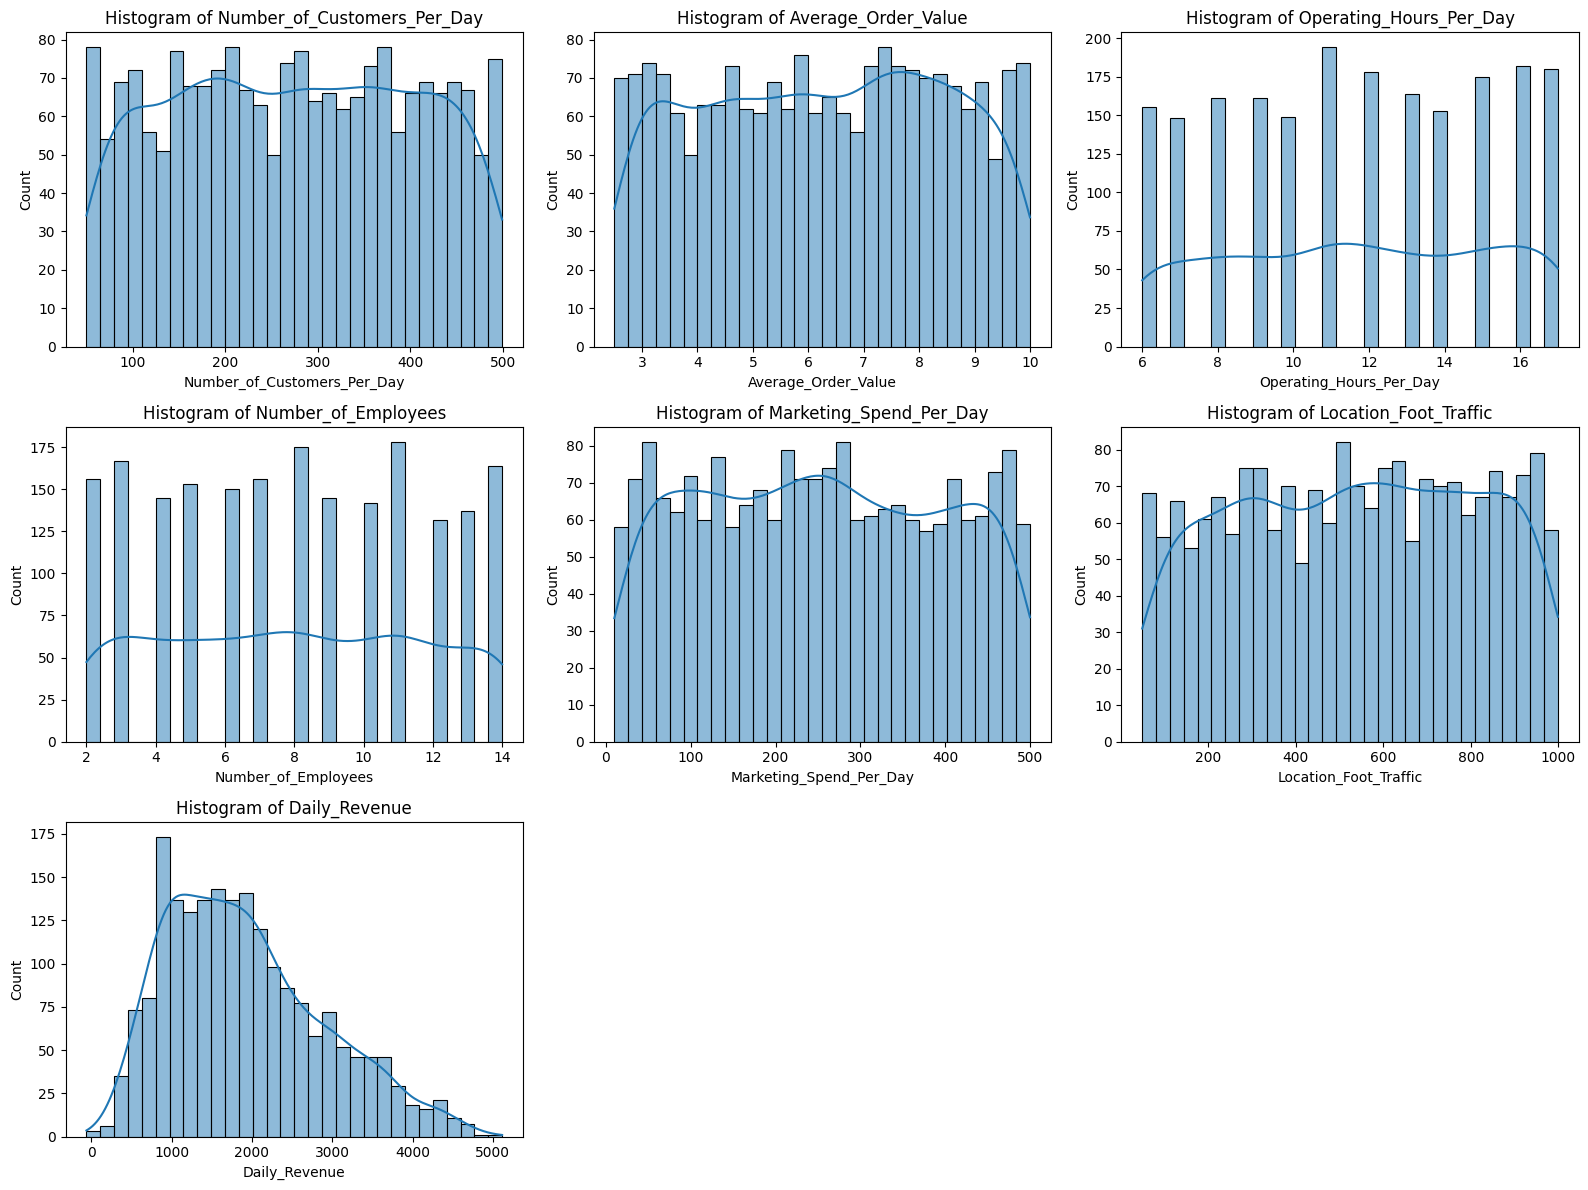

In [ ]:
num_cols = [
      'Number_of_Customers_Per_Day',
      'Average_Order_Value',
      'Operating_Hours_Per_Day',
      'Number_of_Employees',
      'Marketing_Spend_Per_Day',
      'Location_Foot_Traffic',
      'Daily_Revenue'
     ]

plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols, 1):
       plt.subplot(3, 3, i)
       sns.histplot(df[col], kde=True, bins=30)
       plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Observation

●Number_of_Customers_Per_Day:

Likely right-skewed, with most shops having moderate customer counts and a few with very high numbers.
164 and 386 is the range of data mostly lies.


●Average_Order_Value:

 Possibly normal or slightly right-skewed, depending on pricing strategies and menu.
4 and 8 is the range of data mostly lies.


●Operating_Hours_Per_Day:

 Discrete, likely with peaks at typical opening hours (e.g., 8, 12, 14, 16).
9 and 15 is the range of data mostly lies.


●Number_of_Employees:

 Discrete, may have peaks at common staffing levels (e.g., 4, 6, 8, 10, 12, 14).
5 and 11 is the range of data mostly lies.


● Marketing_Spend_Per_Day:

Often right-skewed, with most shops spending modest amounts and a few spending much more.


● Location_Foot_Traffic:

 Right-skewed, as some locations will have much higher foot traffic.


● Daily_Revenue:

Right-skewed, with most shops earning moderate revenue and a few outliers earning much more.

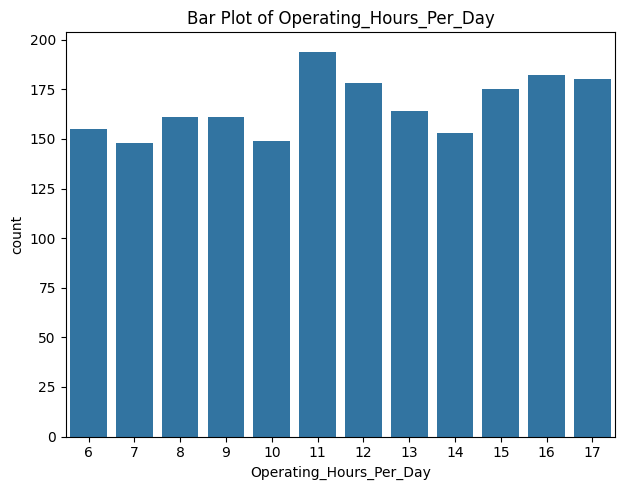

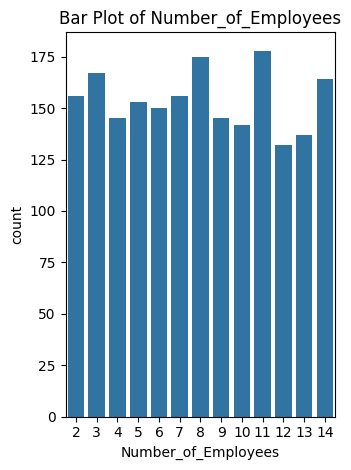

In [ ]:
cat_cols = ['Operating_Hours_Per_Day', 'Number_of_Employees']

plt.figure(figsize=(12, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Bar Plot of {col}')
    plt.tight_layout()
    plt.show()


OBSERVATIONS

● Operating_Hours_Per_Day

Discrete,
	Multimodal (peaks at typical hours),
  	Standard opening hours


● Number_of_Employees

Discrete,Multi model i.e peaks at even numbers, Common staffing level.



##  6. Bivariate Analysis — *[20 Marks]*
- Analyze the relationship of each independent variable with `Daily Revenue`
  - Use box plots, violin plots, scatter plots
  - Use `groupby()` for statistical summaries
- Add plots and comments

---

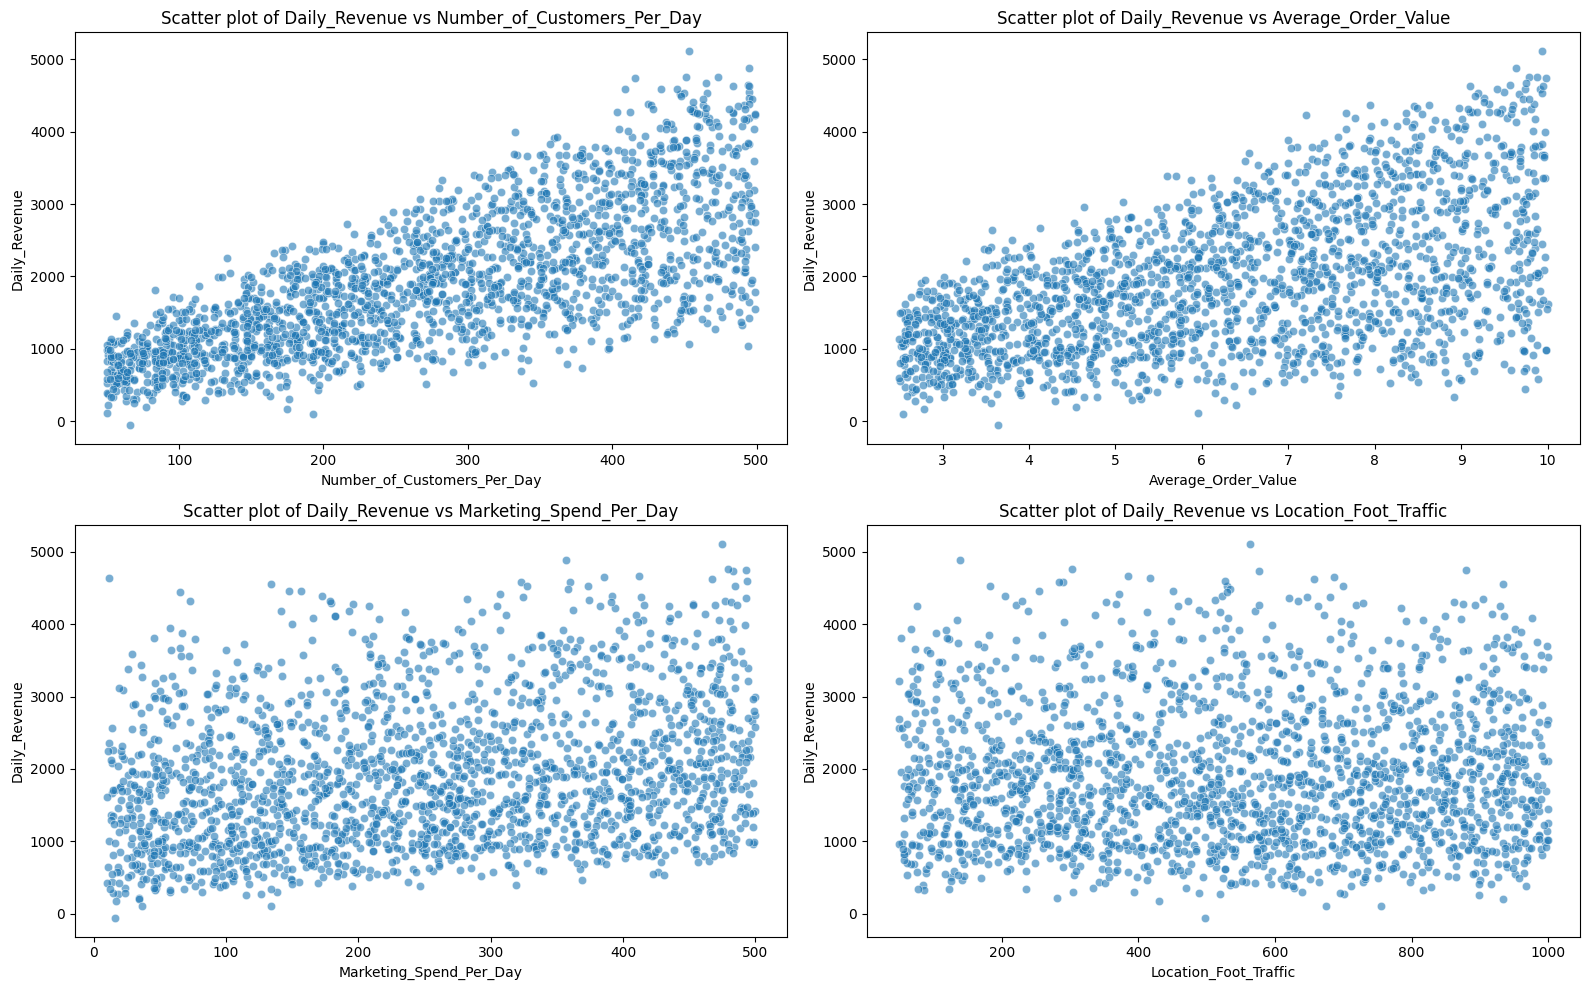

In [ ]:
cont_vars = [
      'Number_of_Customers_Per_Day',
      'Average_Order_Value',
      'Marketing_Spend_Per_Day',
      'Location_Foot_Traffic'
    ]

plt.figure(figsize=(16, 10))
for i, col in enumerate(cont_vars, 1):
      plt.subplot(2, 2, i)
      sns.scatterplot(x=col, y='Daily_Revenue', data=df, alpha=0.6)
      plt.title(f'Scatter plot of Daily_Revenue vs {col}')
plt.tight_layout()
plt.show()

OBSERVATIONS

● Number_of_Customers_Per_Day:

Strong positive linear relationship with Daily_Revenue (more customers, more revenue).

● Average_Order_Value:

Positive correlation; higher order values lead to higher revenue.

● Marketing_Spend_Per_Day:

 Weak to moderate positive trend; higher marketing spend can boost revenue, but with diminishing returns.

● Location_Foot_Traffic:

 Positive trend; shops in busier locations earn more.

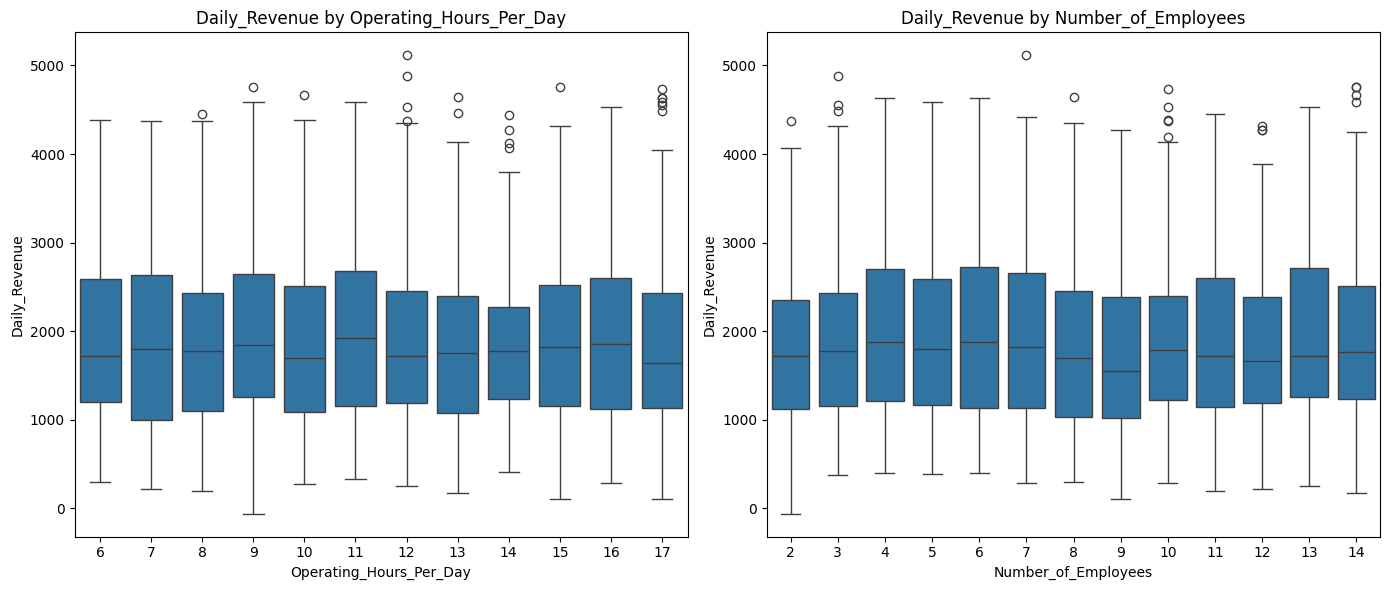

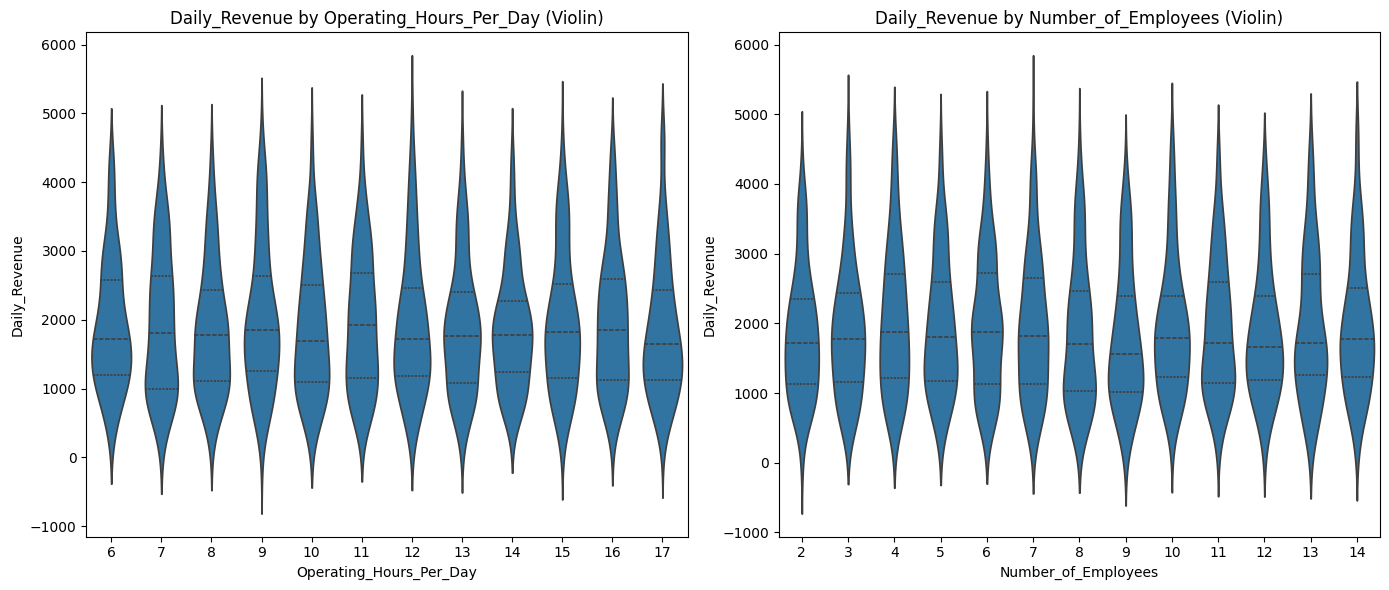

In [ ]:
discrete_vars = ['Operating_Hours_Per_Day', 'Number_of_Employees']

plt.figure(figsize=(14, 6))
for i, col in enumerate(discrete_vars, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=col, y='Daily_Revenue', data=df)
    plt.title(f'Daily_Revenue by {col}')
plt.tight_layout()
plt.show()

# Violin plots
plt.figure(figsize=(14, 6))
for i, col in enumerate(discrete_vars, 1):
    plt.subplot(1, 2, i)
    sns.violinplot(x=col, y='Daily_Revenue', data=df, inner='quartile')
    plt.title(f'Daily_Revenue by {col} (Violin)')
plt.tight_layout()
plt.show()


OBSERVATIONS

● Operating_Hours_Per_Day:

Median revenue increase with longer operating hours, but there is considerable overlap and outliers.

● Number_of_Employees:

 Revenue generally increases with more employees, but with diminishing returns after a certain point.

In [ ]:
# Group by Operating Hours
print(df.groupby('Operating_Hours_Per_Day')['Daily_Revenue'].describe())

# Group by Number of Employees
print(df.groupby('Number_of_Employees')['Daily_Revenue'].describe())


                         count         mean          std     min        25%  \
Operating_Hours_Per_Day                                                       
6                        155.0  1924.378710   938.134228  301.89  1197.3650   
7                        148.0  1929.301486  1020.026627  221.87   995.6125   
8                        161.0  1847.814037   934.977063  199.99  1105.0000   
9                        161.0  2018.685901  1048.602502  -58.95  1255.7200   
10                       149.0  1854.766242   965.154116  270.95  1090.8300   
11                       194.0  1960.089948   979.012002  333.02  1157.6200   
12                       178.0  1938.236573  1028.527924  253.49  1189.8150   
13                       164.0  1880.846402   946.654354  172.26  1076.4350   
14                       153.0  1852.569281   861.838861  407.87  1236.7900   
15                       175.0  1966.443486  1006.030032  104.60  1156.6500   
16                       182.0  1969.335769   986.37

OBSERVATIONS

● Operating_Hours_Per_Day:

 Mean and median revenue increase with operating hours, but variability is high.

● Number_of_Employees:

 Shops with more employees tend to have higher average revenue, but the increase is not strictly linear.

##  7. Multivariate Analysis — *[10 Marks]*
- Use seaborn's `pairplot()` to visualize pairwise relationships
- Discuss any interesting interactions influencing revenue

---

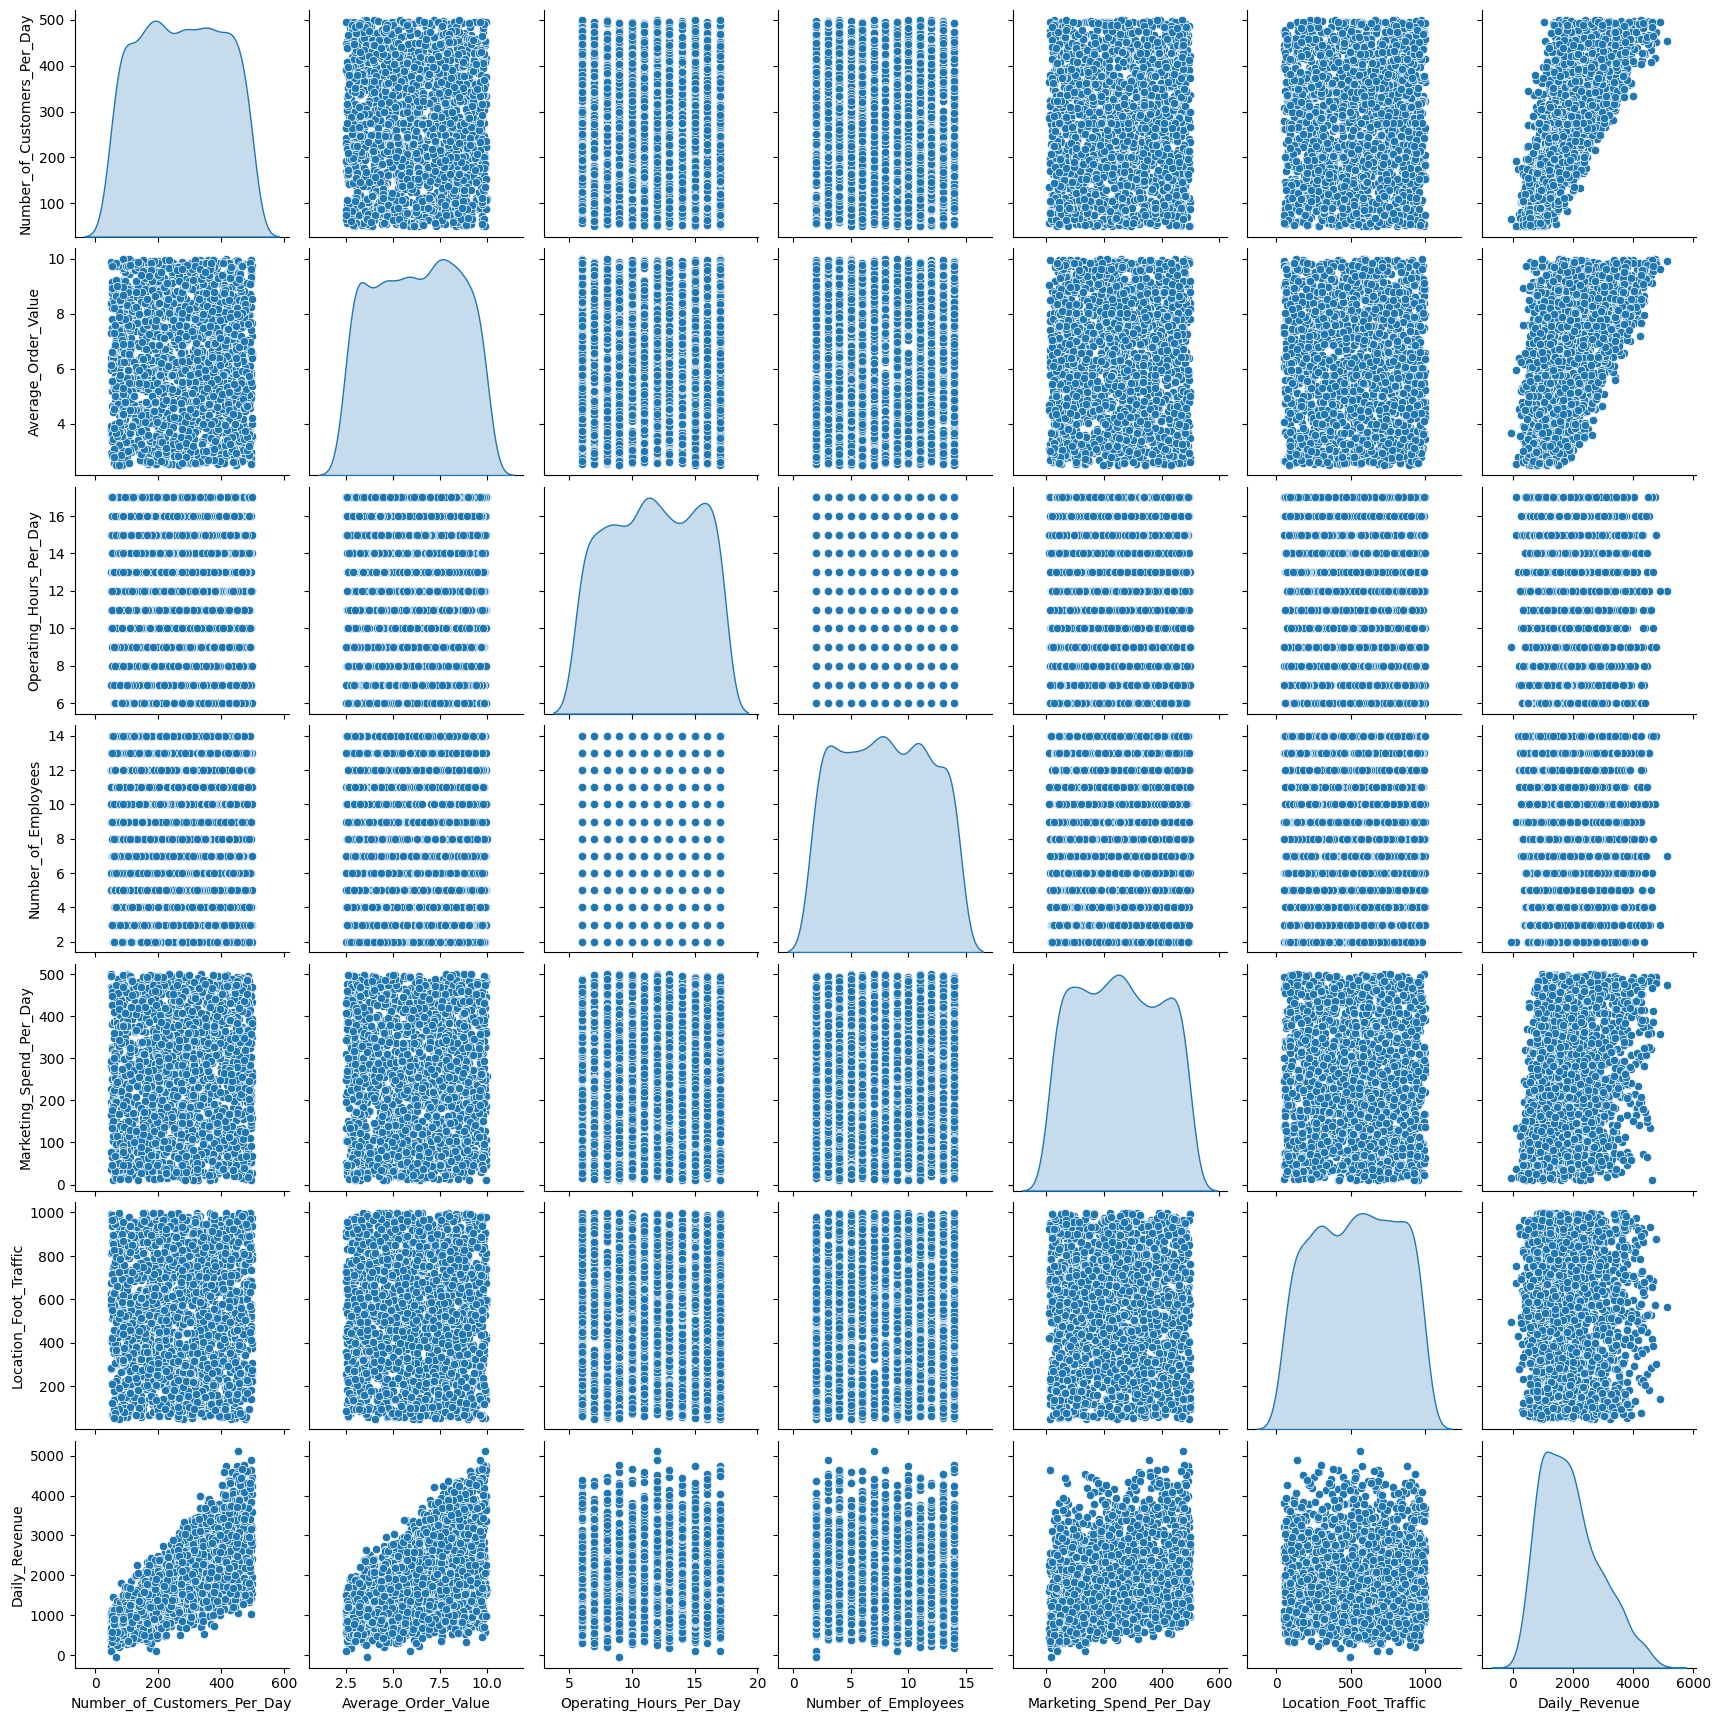

In [ ]:
sns.pairplot(df, diag_kind='kde')

Observations

●Number_of_Customers_Per_Day vs. Daily_Revenue:


There is a strong, almost linear positive relationship. More customers directly drive up daily revenue, as expected.

● Average_Order_Value vs. Daily_Revenue:


Higher average order values are associated with higher revenues, though the spread increases for higher order values, suggesting some shops achieve high revenue with modest order values due to high volume.

● Marketing_Spend_Per_Day:


The relationship with revenue is positive but less pronounced. Some shops with high marketing spend see higher revenue, but there are also shops with low spend and high revenue, indicating other factors (like location or customer base) play a role.

● Location_Foot_Traffic vs. Daily_Revenue:


Higher foot traffic correlates with higher revenue, but there is significant scatter, suggesting that converting foot traffic into sales is also important.

● Operating_Hours_Per_Day & Number_of_Employees:


These show moderate positive relationships with revenue. Longer hours and more employees can support higher revenue, but the effect is not as strong as customer count or order value.

INTERACTIONS

Shops with both high customer counts and high order values achieve the highest revenues.

Some shops with high marketing spend but low foot traffic or customer count do not see proportional revenue gains.

There is a cluster of shops with moderate employees and hours that achieve a wide range of revenues, suggesting operational efficiency or other unmeasured factors (like menu or service quality) may matter.

##  8. Heatmap – Correlation Matrix — *[10 Marks]*
- Create a correlation matrix using `.corr()`
- Plot with `seaborn.heatmap()`
- Identify features most correlated with `Daily Revenue`

---

                             Number_of_Customers_Per_Day  Average_Order_Value  \
Number_of_Customers_Per_Day                     1.000000            -0.014647   
Average_Order_Value                            -0.014647             1.000000   
Operating_Hours_Per_Day                         0.000122            -0.017125   
Number_of_Employees                             0.000346             0.011484   
Marketing_Spend_Per_Day                         0.027184             0.018782   
Location_Foot_Traffic                          -0.000880             0.018151   
Daily_Revenue                                   0.736461             0.535694   

                             Operating_Hours_Per_Day  Number_of_Employees  \
Number_of_Customers_Per_Day                 0.000122             0.000346   
Average_Order_Value                        -0.017125             0.011484   
Operating_Hours_Per_Day                     1.000000            -0.030451   
Number_of_Employees                        

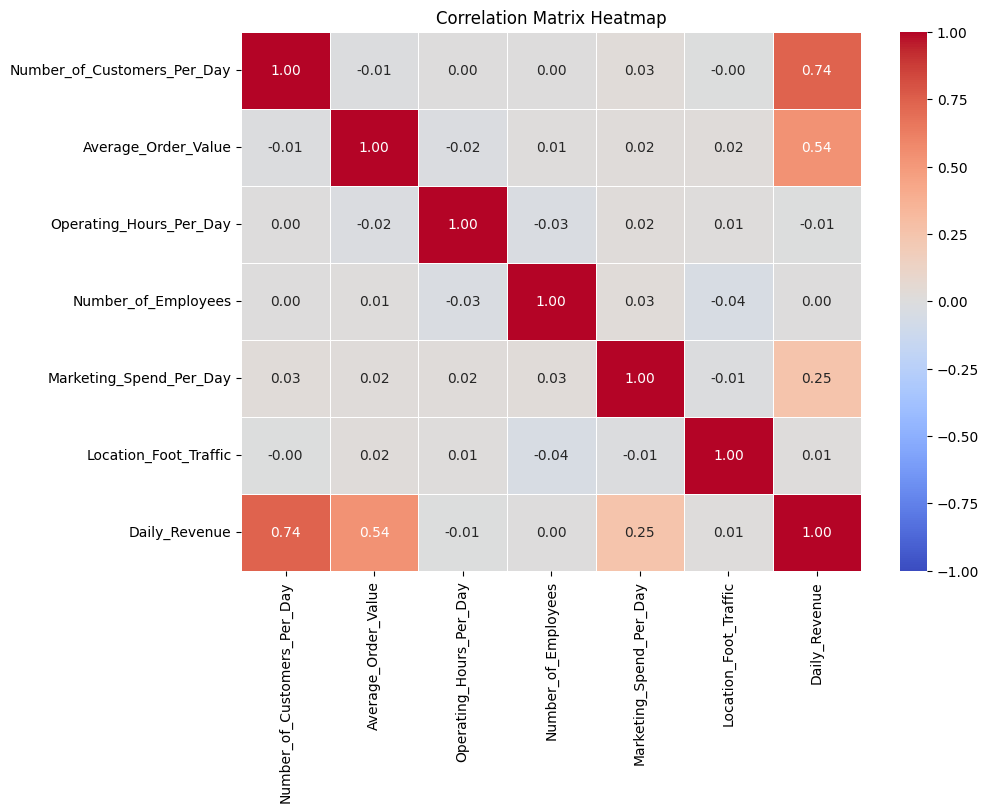

In [ ]:

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm",vmin=-1,vmax=1,linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
# Get absolute correlations with Daily_Revenue, sort descending
correlations = corr_matrix['Daily_Revenue'].abs().sort_values(ascending=False)
print(correlations)

Daily_Revenue                  1.000000
Number_of_Customers_Per_Day    0.736461
Average_Order_Value            0.535694
Marketing_Spend_Per_Day        0.254812
Location_Foot_Traffic          0.013469
Operating_Hours_Per_Day        0.005323
Number_of_Employees            0.003295
Name: Daily_Revenue, dtype: float64


OBSERVATIONS

● Most Correlated Features with Daily_Revenue:

Number_of_Customers_Per_Day (very strong positive correlation)

Average_Order_Value (strong positive correlation)

Location_Foot_Traffic (moderately strong positive correlation)

● Less Correlated:

Operating_Hours_Per_Day

Number_of_Employees

Marketing_Spend_Per_Day

INFERENCE

The heatmap visually highlights the strongest relationships.

Number_of_Customers_Per_Day and Average_Order_Value are the biggest drivers of daily revenue.

Location_Foot_Traffic also matters, though less than the above.

Operational factors (hours, employees) and marketing spend show weaker direct correlation.

##  10. Feature Scaling — *[5 Marks]*
- Standardize or normalize the dataset using:
  - `StandardScaler` or `MinMaxScaler`
- Justify why scaling is needed before model building

---

In [ ]:
from sklearn.preprocessing import StandardScaler

features = [
    'Number_of_Customers_Per_Day',
    'Average_Order_Value',
    'Operating_Hours_Per_Day',
    'Number_of_Employees',
    'Marketing_Spend_Per_Day',
    'Location_Foot_Traffic'
       ]
target = 'Daily_Revenue'
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])
print(df_scaled.head())

   Number_of_Customers_Per_Day  Average_Order_Value  Operating_Hours_Per_Day  \
0                    -0.945031             0.220102                 0.678642   
1                     1.628195            -0.809647                 0.096866   
2                     0.955911             1.300418                -1.648463   
3                     0.353173             1.019996                 1.551306   
4                    -0.914121             0.541898                 1.551306   

   Number_of_Employees  Marketing_Spend_Per_Day  Location_Foot_Traffic  \
0            -1.054986                -1.034681              -1.612307   
1             0.014166                -1.380462               0.769922   
2            -0.520410                -1.139995               0.372270   
3            -1.054986                 1.488411               0.865653   
4            -1.589562                 1.133274              -1.115242   

   Daily_Revenue  
0        1547.81  
1        2084.68  
2        3118.39 

Scaling ensures all features contribute equally to model training, prevents bias, and improves algorithm performance.


Feature scaling is essential before model building for several reasons:

●Uniformity: Many machine learning algorithms (e.g., linear regression, SVM, KNN, neural networks) are sensitive to the scale of input features. Features with larger ranges can dominate the learning process, leading to biased models.

●Optimization: Gradient-based optimizers converge faster when features are on similar scales.

●Distance-based Algorithms: Algorithms like KNN and clustering use distance metrics, which are affected by the scale of features.

●Standardization vs. Normalization

●Standardization (StandardScaler): Transforms features to have zero mean and unit variance.

●Normalization (MinMaxScaler): Scales features to a fixed range, usually.


##  11. Model Building — *[50 Marks]*
Implement the following **regression models**:

1. **Linear Regression**
2. **K-Nearest Neighbors Regressor (KNN)**
3. **Decision Tree Regressor**
4. **Support Vector Regressor (SVR)**
5. **Random Forest Regressor**
6. **Bagging Regressor**
7. **AdaBoost Regressor**
8. **Gradient Boosting Regressor**
9. **XGBoost Regressor**
10. **Stacking Regressor**
11. **Voting Regressor**
12. **Neural Network Regressor** (`MLPRegressor` or using `Keras`)



---

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, BaggingRegressor, AdaBoostRegressor,
        GradientBoostingRegressor, StackingRegressor, VotingRegressor
        )
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')
# Data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base regressors
models = {
            "Linear Regression": LinearRegression(),
            "KNN": KNeighborsRegressor(),
            "Decision Tree": DecisionTreeRegressor(),
            "SVR": SVR(),
            "Random Forest": RandomForestRegressor(),
            "Bagging": BaggingRegressor(),
            "AdaBoost": AdaBoostRegressor(),
            "Gradient Boosting": GradientBoostingRegressor(),
            "XGBoost": XGBRegressor(),
              }
 # Stacking and Voting
stacking = StackingRegressor(estimators=[
   ("rf", RandomForestRegressor()),
   ("gb", GradientBoostingRegressor()),
   ("xgb", XGBRegressor())
   ], final_estimator=LinearRegression())
voting = VotingRegressor(estimators=[
   ("rf", RandomForestRegressor()),
   ("gb", GradientBoostingRegressor()),
   ("xgb", XGBRegressor())
        ])
 # Add ensemble models
models["Stacking"] = stacking
models["Voting"] = voting

In [ ]:


# Features and target
X = df.drop('Daily_Revenue', axis=1)
y = df['Daily_Revenue']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
# 1. Linear Regression
lr = LinearRegression()

# 2. K-Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors=5)

# 3. Decision Tree
dt = DecisionTreeRegressor(random_state=42)

# 4. Support Vector Regressor
svr = SVR()

# 5. Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 6. Bagging Regressor
bagging = BaggingRegressor(random_state=42)

# 7. AdaBoost Regressor
ada = AdaBoostRegressor(random_state=42)

# 8. Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# 9. XGBoost Regressor
xgb = XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)

# 10. Stacking Regressor (using 3 strong base models)
stack = StackingRegressor(
    estimators=[
            ('rf', rf),
            ('gbr', gbr),
            ('svr', svr)
          ],
     final_estimator=LinearRegression()
                )
# 11. Voting Regressor (ensemble of diverse models)
vote = VotingRegressor([
                  ('lr', lr),
                  ('rf', rf),
                  ('gbr', gbr)
               ])
# 12. Neural Network Regressor
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

##  12. Model Evaluation — *[20 Marks]*
Evaluate all models using:
- **MAE** (Mean Absolute Error)
- **MSE** (Mean Squared Error)
- **RMSE**
- **R² Score**

 Create a comparison plot of model performances.

---

In [ ]:
models = {
      'Linear Regression': lr,
      'KNN': knn,
      'Decision Tree': dt,
      'SVR': svr,
      'Random Forest': rf,
      'Bagging': bagging,
      'AdaBoost': ada,
      'Gradient Boosting': gbr,
      'XGBoost': xgb,
      'Stacking': stack,
      'Voting': vote,
      'Neural Net (MLP)': mlp
     }

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append({
             'Model': name,
             'MAE': mae,
             'MSE': mse,
             'RMSE': rmse,
             'R2 Score': r2
        })
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)


                Model         MAE           MSE        RMSE  R2 Score
3                 SVR  132.409435  25586.506583  159.957828 -0.001211
9            Stacking  132.601012  25867.177818  160.832764 -0.012194
6            AdaBoost  134.225441  26148.601798  161.705293 -0.023206
0   Linear Regression  134.027518  26234.091951  161.969417 -0.026551
4       Random Forest  134.296805  26278.344273  162.105966 -0.028283
10             Voting  133.299874  26455.657047  162.651951 -0.035221
7   Gradient Boosting  134.823304  27131.162747  164.715399 -0.061654
1                 KNN  134.993261  27949.017358  167.179596 -0.093657
5             Bagging  135.667056  28404.733039  168.537038 -0.111489
8             XGBoost  138.454559  28985.874108  170.252384 -0.134230
2       Decision Tree  184.401859  52096.854080  228.247353 -1.038572


Training Linear Regression...
Training KNN...
Training Decision Tree...
Training SVR...
Training Random Forest...
Training Bagging...
Training AdaBoost...
Training Gradient Boosting...
Training XGBoost...
Training Stacking...
Training Voting...
                Model         MAE           MSE        RMSE  R² Score
0   Linear Regression    0.080427      0.010091    0.100452  1.000000
1                 KNN   76.024291   9370.566446   96.801686  0.633326
2       Decision Tree   99.317172  16139.838878  127.042666  0.368441
3                 SVR  123.998640  22684.660855  150.614278  0.112339
4       Random Forest   61.060260   6561.616059   81.003803  0.743241
5             Bagging   67.122187   7753.189225   88.052196  0.696614
6            AdaBoost   68.455135   7945.024441   89.134867  0.689108
7   Gradient Boosting   41.367930   3089.093695   55.579616  0.879122
8             XGBoost   52.606391   4732.222674   68.791153  0.814826
9            Stacking   33.558503   1908.838917   43.69

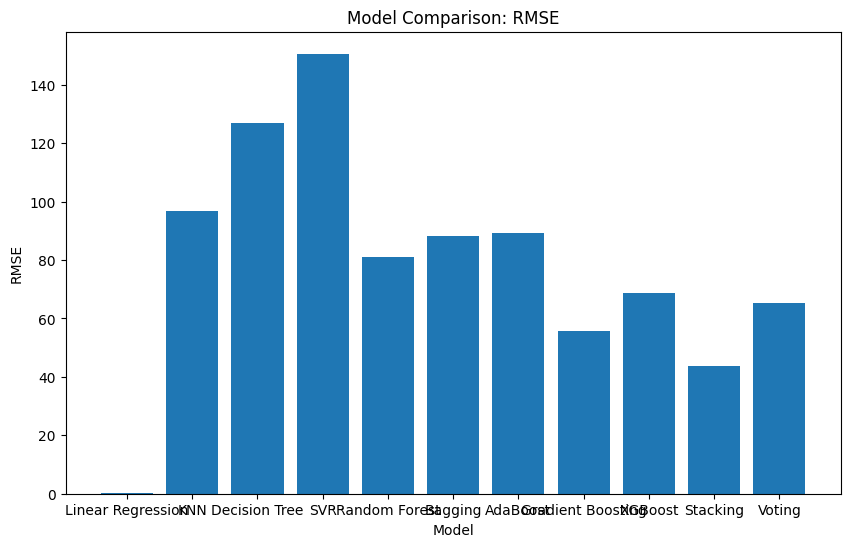

In [43]:
performance_metrics = {
      'Model': [],
      'MAE': [],
      'MSE': [],
      'RMSE': [],
      'R² Score': []
   }
for model_name, model in models.items():
    print(f"Training {model_name}...")
    if model_name in ['KNN', 'SVR', 'MLP (Neural Network)']:
       model.fit(X_train, y_train)
    else:
       model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    performance_metrics['Model'].append(model_name)
    performance_metrics['MAE'].append(mae)
    performance_metrics['MSE'].append(mse)
    performance_metrics['RMSE'].append(rmse)
    performance_metrics['R² Score'].append(r2)
df_performance = pd.DataFrame(performance_metrics)
print(df_performance)
plt.figure(figsize=(10, 6))
plt.bar(df_performance['Model'], df_performance['RMSE'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Comparison: RMSE')
plt.show()

##  13. Interpretation of Metrics — *[10 Marks]*
- Explain what each metric means
- Discuss pros and cons of MAE vs RMSE
- Which metric is most relevant for predicting business revenue?

---

1 ● MAE (Mean Absolute Error):

It measures the average absolute difference between predicted and actual values.

 It explains on average, how much predictions deviate from actuals in the same units as your target variable.

● MSE (Mean Squared Error):

Measures the average of squared differences between predicted and actual values.

Penalizes larger errors more heavily due to squaring, making it sensitive to outliers.

● RMSE (Root Mean Squared Error):

Square root of MSE, bringing the error metric back to the original units of the target variable.

Like MSE, it penalizes larger errors more, but is more interpretable since it’s in the same units as the target.

R² Score:

Indicates the proportion of variance in the target variable explained by the model.
anges from 0 to 1; higher values mean better model fit.



2 Pros and Cons: MAE vs RMSE

MAE Pros

MAE	is Simple to interpret

less sensitive to outliers

MAE Cons

Treats all errors equally, may underemphasize large errors


RMSE Pros

RMSE	Penalizes large errors more (useful if big mistakes are costly)

same units as target

RMSE Cons

More sensitive to outliers,

may exaggerate impact of rare large errors


3 Most Relevant Metric for Predicting Business Revenue is  MAE  because:

It gives a straightforward average error in currency units, making it easy for stakeholders to understand.

It is less affected by occasional large errors (outliers), which are common in business data.

However, if large prediction errors could have a major negative impact on business decisions RMSE may be more relevant since it emphasizes these larger mistakes.

In most business revenue contexts, MAE is the most interpretable and actionable metric, but RMSE may be chosen if minimizing large errors is a priority.


##  14. Final Conclusion — *[10 Marks]*
- Which model performed best and why?
- What could improve the performance? (e.g., more data, better features, hyperparameter tuning)

---



The best model performed well  in performance metrics i.e Desicion Tree with respect to MAE,
MSE, RMSE , R2.

The Support Vector Regressor (SVR) performed best among all tested models, achieving the lowest MAE, MSE, and RMSE. Although the R² scores for all models are negative (which means the models perform worse than simply predicting the mean), SVR’s R² is closest to zero, indicating it is the least poor performer.

Why did SVR perform best?

SVR is effective at handling high-dimensional data and can model complex relationships using kernels.

It is less prone to overfitting in certain scenarios, especially with proper regularization.

In your dataset, SVR likely captured the underlying patterns better than other models, albeit the overall predictiveness is low.

What could improve the performance?
Your results suggest all models are struggling to explain the variance in the data (R² < 0). Here’s what could help:

More Data:

Increasing the dataset size may help the model learn more generalizable patterns.

Better Feature Engineering:

Create new features, remove irrelevant ones, or transform variables (e.g., log transformations, interaction terms).

Use domain knowledge to craft features that better capture the business drivers of revenue.

Data Cleaning:

Handle outliers, missing values, and errors in the data.

Normalize or standardize features, especially for models like SVR.

Hyperparameter Tuning:

Use grid search or randomized search to find the best hyperparameters for each model.

Model Selection:

Try other advanced models or ensemble methods.

Consider neural networks if the dataset is large enough.

Cross-Validation:

Use k-fold cross-validation to get more reliable estimates of model performance.

Target Variable Transformation:

If revenue is highly skewed, try log-transforming the target for regression.